이번에는 어도비 (Adobe)의 직원 분포를 한번 살펴봅시다.
어도비 전체 직원들의 직군 분포를 파이 그래프로 그려보세요.
(인원이 0인 직군은 그래프에 표시되지 않아야 합니다.)

In [1]:
%matplotlib inline
import pandas as pd

In [3]:
df = pd.read_csv('../data/silicon_valley_details.csv')
df

,company,year,race,gender,job_category,count
0,23andMe,2016,Hispanic_or_Latino,male,Executives,0
1,23andMe,2016,Hispanic_or_Latino,male,Managers,1
2,23andMe,2016,Hispanic_or_Latino,male,Professionals,7
3,23andMe,2016,Hispanic_or_Latino,male,Technicians,0
4,23andMe,2016,Hispanic_or_Latino,male,Sales workers,0
...,...,...,...,...,...,...
4435,Sanmina,2016,Overall_totals,NaN,laborers and helpers,4
4436,Sanmina,2016,Overall_totals,NaN,Service workers,57
4437,Sanmina,2016,Overall_totals,NaN,Totals,5205
4438,Sanmina,2016,Overall_totals,NaN,Previous_totals,5615


In [23]:
# 어도비 직원만 추출
boolean_adobe = df['company'] == 'Adobe'
# 직업별로 인종을 모두 합친 Overall_totals 사용
boolean_all_races = df['race'] == 'Overall_totals'
# 인원이 0인 직군은 제거
boolean_count = df['count'] != 0
df[boolean_adobe & boolean_all_races & boolean_count]

,company,year,race,gender,job_category,count
333,Adobe,2016,Overall_totals,NaN,Executives,93
334,Adobe,2016,Overall_totals,NaN,Managers,2448
335,Adobe,2016,Overall_totals,NaN,Professionals,3028
337,Adobe,2016,Overall_totals,NaN,Sales workers,1270
338,Adobe,2016,Overall_totals,NaN,Administrative support,323
343,Adobe,2016,Overall_totals,NaN,Totals,7162
344,Adobe,2016,Overall_totals,NaN,Previous_totals,6581


In [42]:
# 'Totals' 혹은 'Previous_totals'인 데이터 제거 (합계가 같이 출력되는 문제 발생)
boolean_job_category = (df['job_category'] != 'Totals') & (df['job_category'] != 'Previous_totals')
df_adobe = df[boolean_adobe & boolean_all_races & boolean_count & boolean_job_category]
df_adobe

,company,year,race,gender,job_category,count
333,Adobe,2016,Overall_totals,NaN,Executives,93
334,Adobe,2016,Overall_totals,NaN,Managers,2448
335,Adobe,2016,Overall_totals,NaN,Professionals,3028
337,Adobe,2016,Overall_totals,NaN,Sales workers,1270
338,Adobe,2016,Overall_totals,NaN,Administrative support,323


<Axes: ylabel='count'>

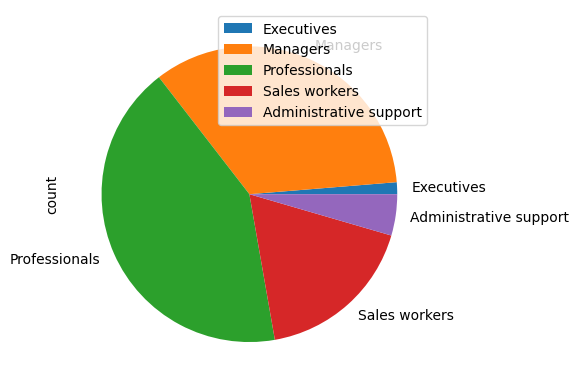

In [43]:
# set_index(): 특정 열을 인덱스로 설정하는 메서드
df_adobe.set_index('job_category', inplace=True)
df_adobe.plot(kind='pie', y= 'count')